In [2]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

data_dir = '../datasets/artificial_data/'
# dataset_name = 'SimpleNoisyCircleImageGenerator'
dataset_name = 'SimpleNoisyImageGenerator'


resnet = ResNetModel(
    data_dir=f'{data_dir}{dataset_name}', 
    num_epochs=3,
    learning_rate=0.01,
    weight_decay=1e-5,
    early_stopping_tol=3,
    early_stopping_min_delta=10
)


resnet.load_data()
resnet.train()
resnet.evaluate()

Is cuda available:  False
Epoch 1/3, Train Loss: 1271.7120971679688, Val Loss: 3.372583560982435e+20
Epoch 2/3, Train Loss: 1.5924400364034206e+21, Val Loss: 3.185778822435632e+21
Epoch 3/3, Train Loss: 1045484.9902954102, Val Loss: 3410839.0
Loss of the network on the test images: 1354375.25


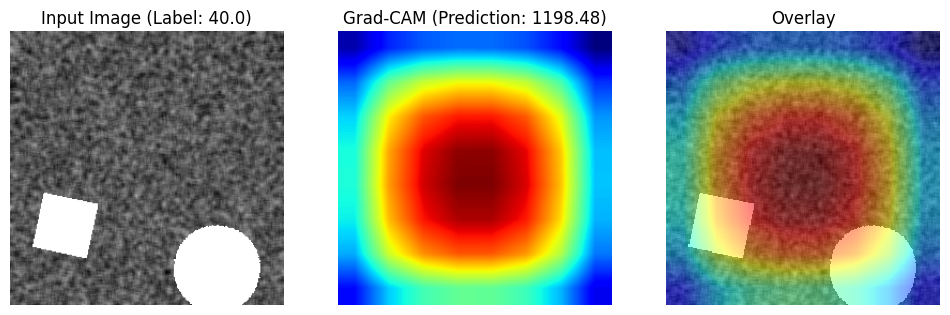

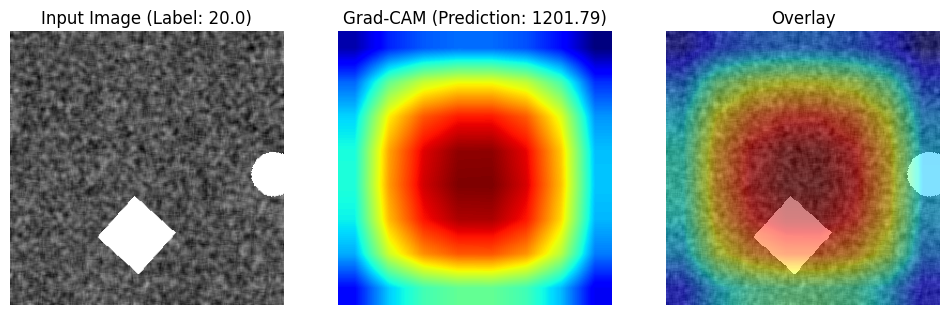

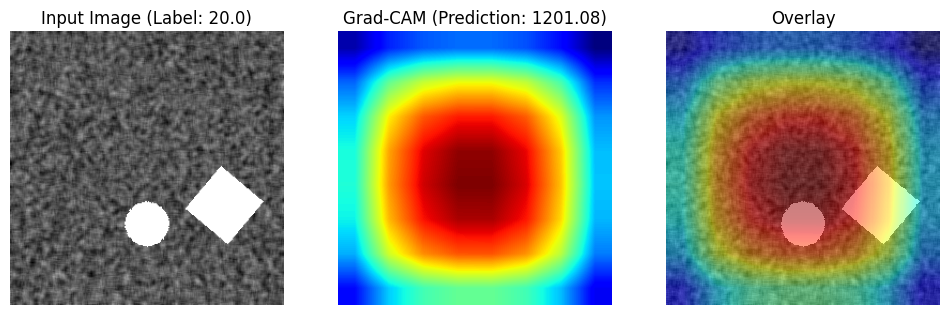

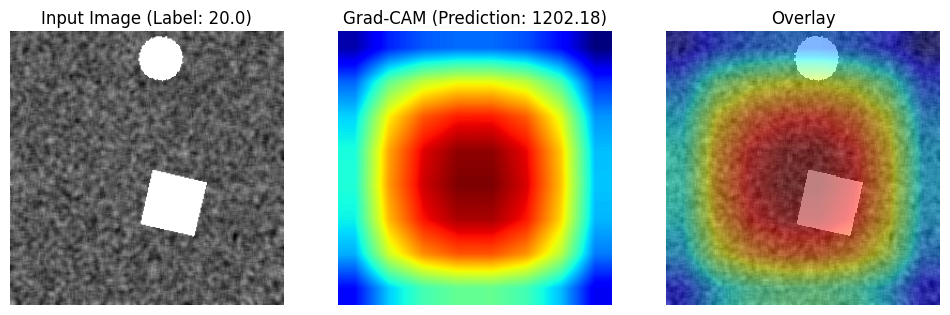

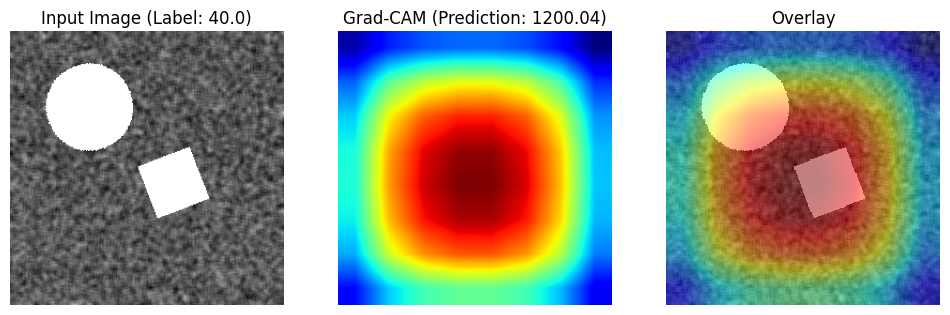

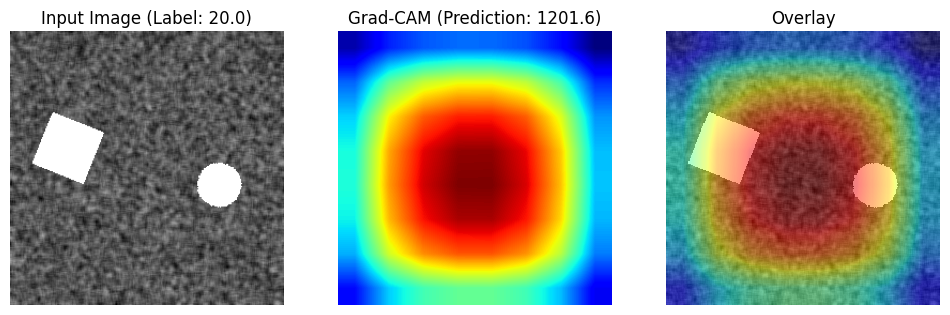

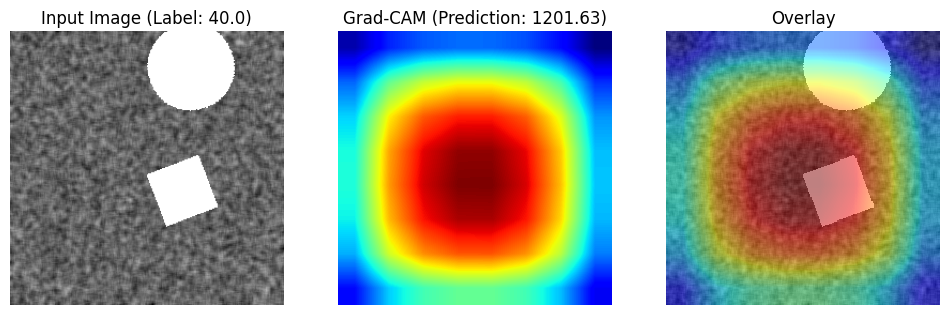

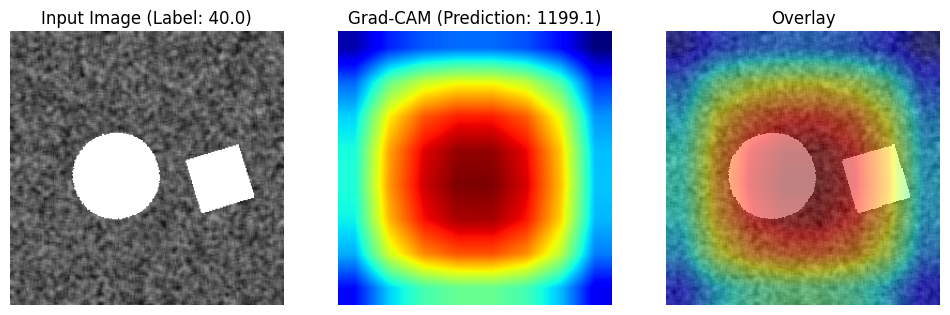

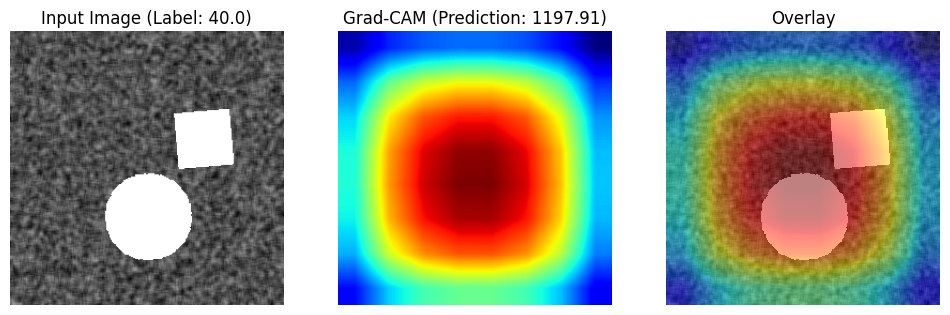

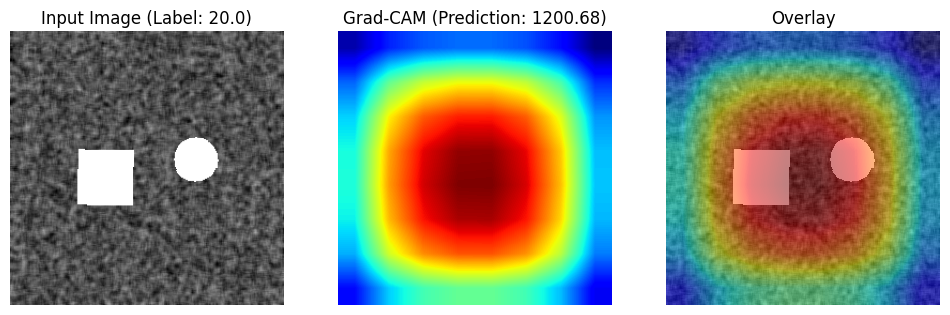

In [50]:
from src.XAI.GradCam import GradCamResnet
importlib.reload(sys.modules['src.XAI.GradCam'])
importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])

grad_cam = GradCamResnet(resnet)
grad_cam.generateMultipleGradCam(10, save_output=True, save_dir='gradcam_output')

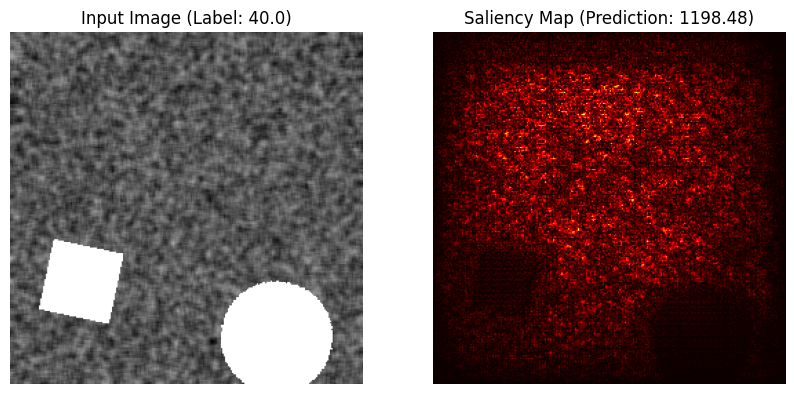

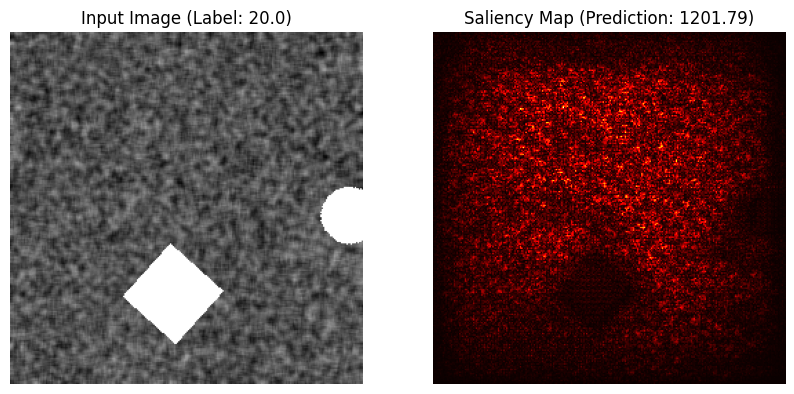

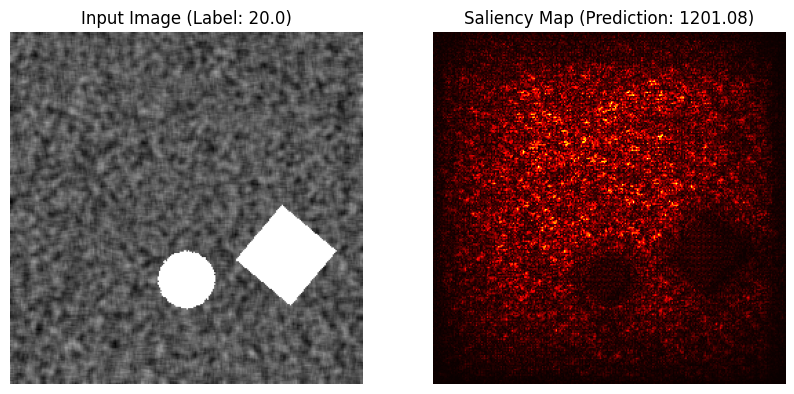

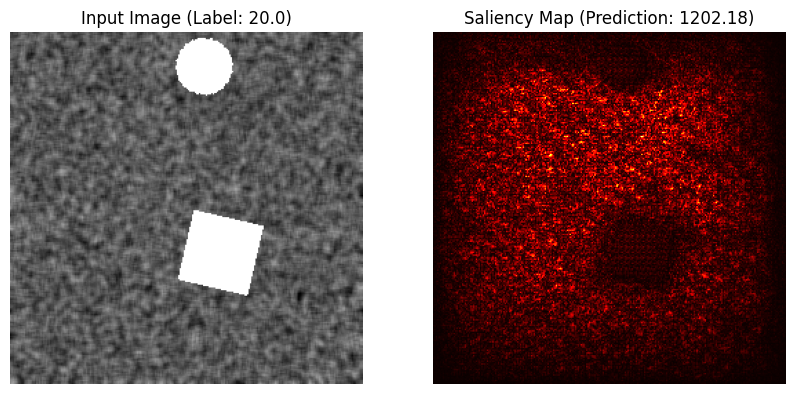

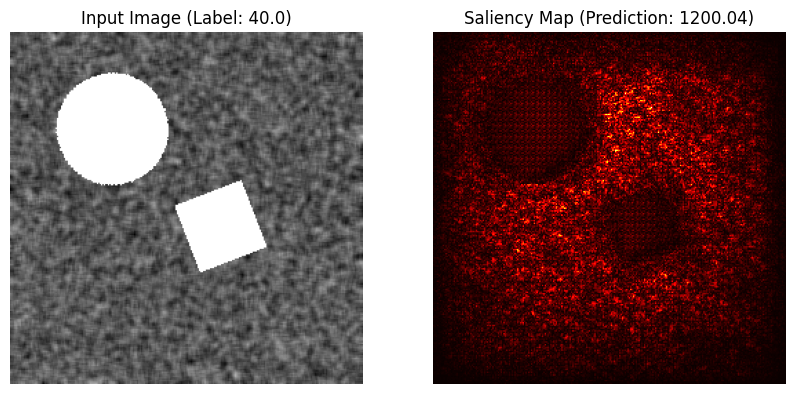

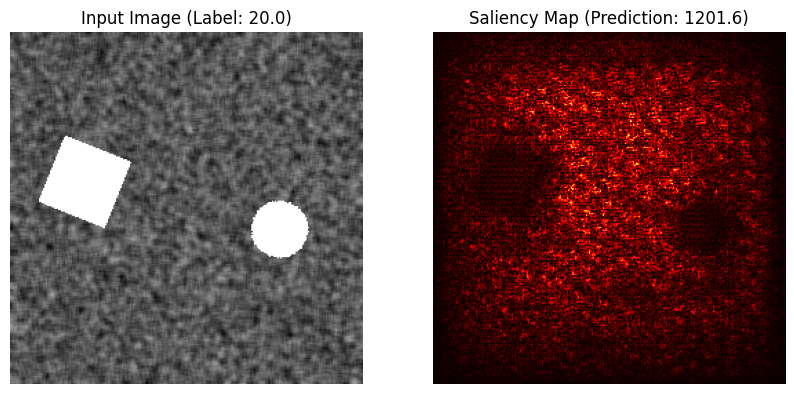

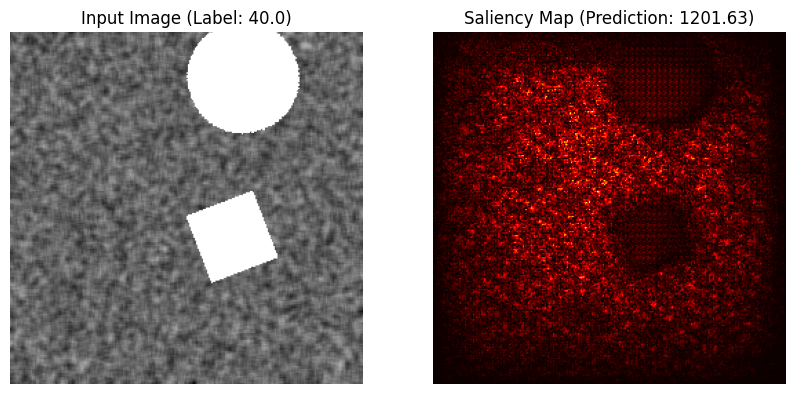

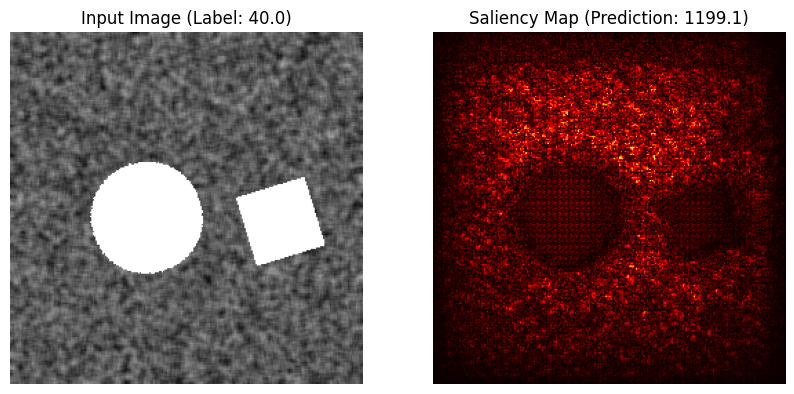

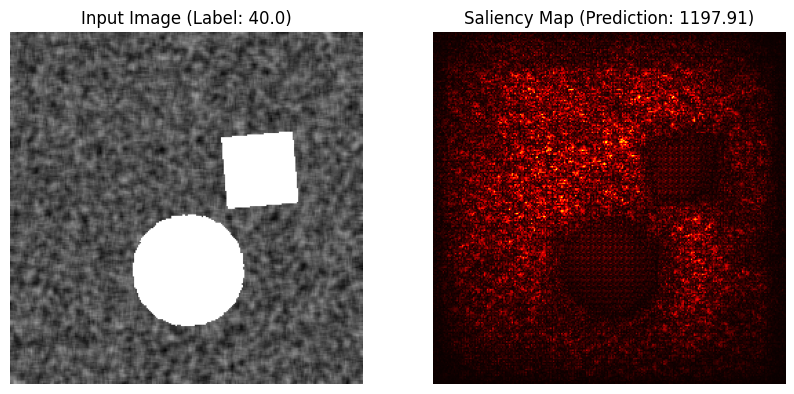

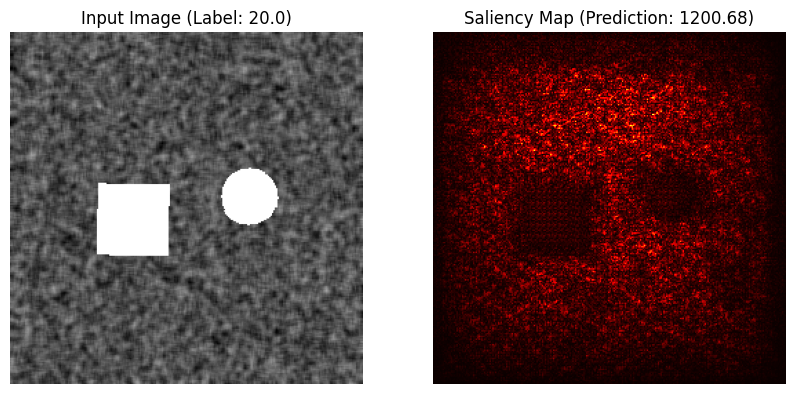

In [36]:
from src.XAI.VanillaSaliency import VanillaSaliency
importlib.reload(sys.modules['src.XAI.VanillaSaliency'])

# Assuming XAIResNet was already imported previously

# Initialize XAI instance
xai_resnet = VanillaSaliency(modelWrapper=resnet, device=resnet.device)
xai_resnet.get_saliency_maps(image_count=10)